In [ ]:
import os
import torch
import pandas as pd
import numpy as np
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, random_split, DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from collections import OrderedDict
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/wyze/StanfordDogs/testing/wyze-20220426T173221Z-001.zip -d /content/drive/MyDrive/wyze/StanfordDogs/testing/new_test

In [ ]:
data_dir = '/content/drive/MyDrive/wyze/StanfordDogs/Images'

# Define train and test path 
train_path = os.path.join(data_dir, 'train')

#test_path = os.path.join(data_dir, 'test88/test')
test_path = '/content/drive/MyDrive/wyze/StanfordDogs/testing/new_test/new_testImages'
#test_path = '/content/drive/MyDrive/wyze/StanfordDogs/testing/new_test/wyze'

In [ ]:
dataset = ImageFolder(train_path)
print(dataset)
train_size = len(dataset)
print("Number of Train images:", train_size)
train_classes = len(dataset.classes)
print("Number of Training class:", train_classes)

Dataset ImageFolder
    Number of datapoints: 20579
    Root location: /content/drive/MyDrive/wyze/StanfordDogs/Images/train
Number of Train images: 20579
Number of Training class: 120


In [ ]:
print(len(dataset.imgs))


20579


In [ ]:
#train_dataset.

In [ ]:
dogs_dict = dataset.class_to_idx
print(dogs_dict)
print("Num of classes", len((dataset.class_to_idx)))

{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9, 'n02088238-basset': 10, 'n02088364-beagle': 11, 'n02088466-bloodhound': 12, 'n02088632-bluetick': 13, 'n02089078-black-and-tan_coonhound': 14, 'n02089867-Walker_hound': 15, 'n02089973-English_foxhound': 16, 'n02090379-redbone': 17, 'n02090622-borzoi': 18, 'n02090721-Irish_wolfhound': 19, 'n02091032-Italian_greyhound': 20, 'n02091134-whippet': 21, 'n02091244-Ibizan_hound': 22, 'n02091467-Norwegian_elkhound': 23, 'n02091635-otterhound': 24, 'n02091831-Saluki': 25, 'n02092002-Scottish_deerhound': 26, 'n02092339-Weimaraner': 27, 'n02093256-Staffordshire_bullterrier': 28, 'n02093428-American_Staffordshire_terrier': 29, 'n02093647-Bedlington_terrier': 30, 'n02093754-Border_terrier': 31, 'n02093859-Kerry_blue

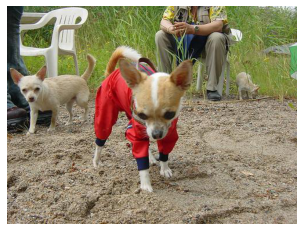

In [ ]:
plt.imshow(dataset[10][0])
plt.axis('off')
plt.show()

In [ ]:
dog_labels_train = []

def rename(name):
    return ' '.join(' '.join(name.split('-')[1:]).split('_'))

for n in dataset.classes:
    dog_labels_train.append(rename(n))

In [ ]:
dog_labels_train

['Chihuahua',
 'Japanese spaniel',
 'Maltese dog',
 'Pekinese',
 'Shih Tzu',
 'Blenheim spaniel',
 'papillon',
 'toy terrier',
 'Rhodesian ridgeback',
 'Afghan hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black and tan coonhound',
 'Walker hound',
 'English foxhound',
 'redbone',
 'borzoi',
 'Irish wolfhound',
 'Italian greyhound',
 'whippet',
 'Ibizan hound',
 'Norwegian elkhound',
 'otterhound',
 'Saluki',
 'Scottish deerhound',
 'Weimaraner',
 'Staffordshire bullterrier',
 'American Staffordshire terrier',
 'Bedlington terrier',
 'Border terrier',
 'Kerry blue terrier',
 'Irish terrier',
 'Norfolk terrier',
 'Norwich terrier',
 'Yorkshire terrier',
 'wire haired fox terrier',
 'Lakeland terrier',
 'Sealyham terrier',
 'Airedale',
 'cairn',
 'Australian terrier',
 'Dandie Dinmont',
 'Boston bull',
 'miniature schnauzer',
 'giant schnauzer',
 'standard schnauzer',
 'Scotch terrier',
 'Tibetan terrier',
 'silky terrier',
 'soft coated wheaten terrier',
 'West Highland wh

In [ ]:
test_dataset = ImageFolder(test_path)
print(test_dataset)
test_size = len(test_dataset)
print("Number of Train images:", test_size)
test_classes = len(test_dataset.classes)
print("Number of Training class:", test_classes)

Dataset ImageFolder
    Number of datapoints: 1817
    Root location: /content/drive/MyDrive/wyze/StanfordDogs/testing/new_test/new_testImages
Number of Train images: 1817
Number of Training class: 25


In [ ]:
print(len(test_dataset.imgs))

1817


In [ ]:
test_dataset.classes

['n02085620-Chihuahua',
 'n02086646-Blenheim_spaniel',
 'n02087046-toy_terrier',
 'n02088364-beagle',
 'n02092339-Weimaraner',
 'n02093428-American_Staffordshire_terrier',
 'n02095314-wire-haired_fox_terrier',
 'n02097047-miniature_schnauzer',
 'n02098286-West_Highland_white_terrier',
 'n02099601-golden_retriever',
 'n02099712-Labrador_retriever',
 'n02105641-Old_English_sheepdog',
 'n02106030-collie',
 'n02106550-Rottweiler',
 'n02106662-German_shepherd',
 'n02107142-Doberman',
 'n02108089-boxer',
 'n02110063-malamute',
 'n02110185-Siberian_husky',
 'n02110958-pug',
 'n02112018-Pomeranian',
 'n02113023-Pembroke',
 'n02113186-Cardigan',
 'n02113799-standard_poodle',
 'n02115641-dingo']

In [ ]:
test_dict = test_dataset.class_to_idx
print(test_dict)
print("Num of classes : ", len((test_dict)))

{'n02085620-Chihuahua': 0, 'n02086646-Blenheim_spaniel': 1, 'n02087046-toy_terrier': 2, 'n02088364-beagle': 3, 'n02092339-Weimaraner': 4, 'n02093428-American_Staffordshire_terrier': 5, 'n02095314-wire-haired_fox_terrier': 6, 'n02097047-miniature_schnauzer': 7, 'n02098286-West_Highland_white_terrier': 8, 'n02099601-golden_retriever': 9, 'n02099712-Labrador_retriever': 10, 'n02105641-Old_English_sheepdog': 11, 'n02106030-collie': 12, 'n02106550-Rottweiler': 13, 'n02106662-German_shepherd': 14, 'n02107142-Doberman': 15, 'n02108089-boxer': 16, 'n02110063-malamute': 17, 'n02110185-Siberian_husky': 18, 'n02110958-pug': 19, 'n02112018-Pomeranian': 20, 'n02113023-Pembroke': 21, 'n02113186-Cardigan': 22, 'n02113799-standard_poodle': 23, 'n02115641-dingo': 24}
Num of classes :  25


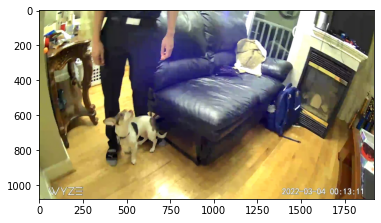

In [ ]:
plt.imshow(test_dataset[10][0])
plt.axis('on')
plt.show()

In [ ]:
dog_labels_test = []

def rename(name):
    return ' '.join(' '.join(name.split('-')[1:]).split('_'))

for n in test_dataset.classes:
    dog_labels_test.append(rename(n))

In [ ]:
print("Number of Test Classes:" , len(dog_labels_test))
dog_labels_test

Number of Test Classes: 25


['Chihuahua',
 'Blenheim spaniel',
 'toy terrier',
 'beagle',
 'Weimaraner',
 'American Staffordshire terrier',
 'wire haired fox terrier',
 'miniature schnauzer',
 'West Highland white terrier',
 'golden retriever',
 'Labrador retriever',
 'Old English sheepdog',
 'collie',
 'Rottweiler',
 'German shepherd',
 'Doberman',
 'boxer',
 'malamute',
 'Siberian husky',
 'pug',
 'Pomeranian',
 'Pembroke',
 'Cardigan',
 'standard poodle',
 'dingo']

Creating training, validation and testing dataset


In [ ]:
random_seed = 45
torch.manual_seed(random_seed);

In [ ]:
dataset_size = len(dataset)
print("Train set before splitting:", dataset_size)
val_pct = 0.1
val_size = int(dataset_size*val_pct)
train_size = dataset_size - val_size

print("Train set : {} \nVal set : {} \nTest set : {}".format(train_size , val_size, test_size))
#train_size, val_size, test_size

Train set before splitting: 20579
Train set : 18522 
Val set : 2057 
Test set : 1817


In [ ]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
test_ds, _ = random_split(test_dataset, [len(test_dataset), 0])

len(train_ds), len(val_ds), len(test_ds)

(18522, 2057, 1817)

In [ ]:
type(train_ds)

torch.utils.data.dataset.Subset

In [ ]:
type(test_ds)

torch.utils.data.dataset.Subset

n02100735-English_setter
<class 'PIL.Image.Image'>


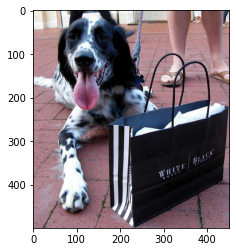

In [ ]:
img, label = train_ds[6]
print(dataset.classes[label])
plt.imshow(img)
print(type(img))

n02110185-Siberian_husky
<class 'PIL.Image.Image'>


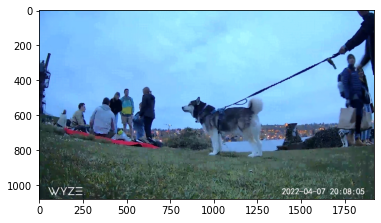

In [ ]:
img, label = test_ds[6]
print(test_dataset.classes[label])
plt.imshow(img)
print(type(img))

custom dataset

In [ ]:
class DogBreedDataset(Dataset):
    
    def __init__(self, ds, transform=None):
        self.ds = ds
        self.transform = transform
        
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        img, label = self.ds[idx]
        if self.transform:
            img = self.transform(img)  
            return img, label

In [ ]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

In [ ]:
train_transform = transforms.Compose([
#    transforms.Resize((224, 224)),
    transforms.Resize((256, 256)),
    #transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=30),
    transforms.GaussianBlur(kernel_size=3.0, sigma=(0.1, 2.0)),
    transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
#    transforms.Normalize(*imagenet_stats, inplace=True)
    
])

val_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
#    transforms.Normalize(*imagenet_stats, inplace=True)
])

test_transform = transforms.Compose([
    transforms.Resize((256,256)), 
    transforms.ToTensor(),
#    transforms.Normalize(*imagenet_stats, inplace=True)
])

In [ ]:
train_dataset = DogBreedDataset(train_ds, train_transform)
val_dataset = DogBreedDataset(val_ds, val_transform)
test_dataset = DogBreedDataset(test_ds, test_transform)

In [ ]:
batch_size =64

# Create DataLoaders
train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_dataset, batch_size*2, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
for i in train_dl:
  print(i)
  break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 

In [ ]:
for i in test_dl:
  print(i)
  break

[tensor([[[[0.3490, 0.3529, 0.3647,  ..., 0.4549, 0.4196, 0.4314],
          [0.3569, 0.3647, 0.3647,  ..., 0.4588, 0.4118, 0.3843],
          [0.3843, 0.3843, 0.3686,  ..., 0.4588, 0.3922, 0.3098],
          ...,
          [0.4078, 0.4078, 0.4118,  ..., 0.4745, 0.4549, 0.4431],
          [0.4078, 0.4078, 0.4118,  ..., 0.4745, 0.4510, 0.4392],
          [0.4078, 0.4078, 0.4118,  ..., 0.4824, 0.4588, 0.4353]],

         [[0.3647, 0.3647, 0.3725,  ..., 0.5255, 0.5059, 0.5294],
          [0.3686, 0.3725, 0.3765,  ..., 0.5294, 0.5020, 0.4863],
          [0.3961, 0.3961, 0.3804,  ..., 0.5294, 0.4863, 0.4118],
          ...,
          [0.3725, 0.3725, 0.3765,  ..., 0.4588, 0.4275, 0.4157],
          [0.3725, 0.3725, 0.3765,  ..., 0.4863, 0.4431, 0.4118],
          [0.3725, 0.3725, 0.3765,  ..., 0.5059, 0.4627, 0.4157]],

         [[0.2784, 0.2784, 0.2902,  ..., 0.5608, 0.5294, 0.5176],
          [0.2980, 0.2941, 0.2941,  ..., 0.5686, 0.5137, 0.4431],
          [0.3294, 0.3216, 0.3020,  ..., 

In [ ]:
def show_batch(dl):
    for img, lb in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(img.cpu(), nrow=16).permute(1,2,0))
        break

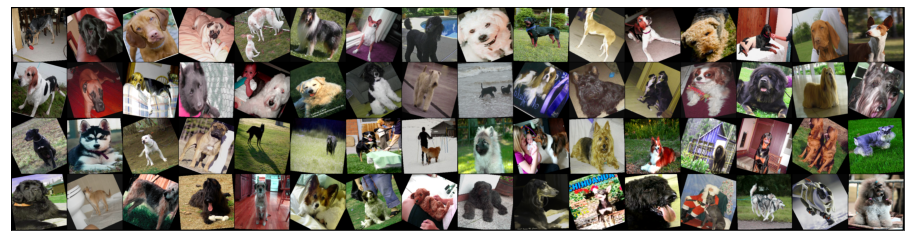

In [ ]:
show_batch(train_dl)

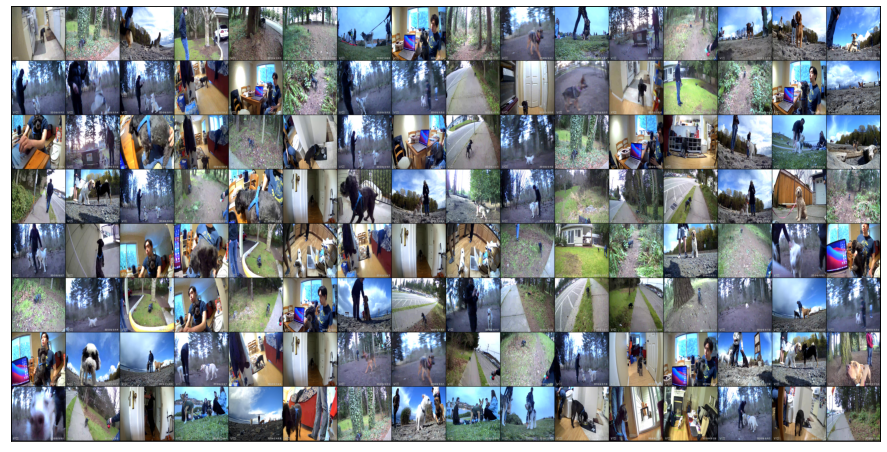

In [ ]:
show_batch(test_dl)

network

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
    # training step
    def training_step(self, batch):
        img, targets = batch
        out = self(img)
        loss = F.nll_loss(out, targets)
        return loss
    
    # validation step
    def validation_step(self, batch):
        img, targets = batch
        out = self(img)
        loss = F.nll_loss(out, targets)
        acc = accuracy(out, targets)
        return {'val_acc':acc.detach(), 'val_loss':loss.detach()}
    
    # validation epoch end
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
        
    # print result end epoch
    def epoch_end(self, epoch, result):
        print("Epoch [{}] : train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result["train_loss"], result["val_loss"], result["val_acc"]))
        

In [ ]:
class DogBreedPretrainedResnet50(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.network = models.resnet50(pretrained=False)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Sequential(
            nn.Linear(num_ftrs, 120),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model_resnet50 = DogBreedPretrainedResnet50()

In [ ]:
model_resnet50_5eps = DogBreedPretrainedResnet50()

In [ ]:
for param in model_resnet50.parameters():
  print(param.data)
  break

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(d, device) for d in data]
    else:
        return data.to(device, non_blocking=True)

In [ ]:
class DeviceDataLoader:
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __len__(self):
        return len(self.dl)
    
    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)

In [ ]:
# getting default device
device = get_default_device()
print(device)

# moving train dataloader and val dataloader to gpu
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)


# moving model to gpu
to_device(model_resnet50, device);

cuda


In [ ]:
test_dl = DeviceDataLoader(test_dl, device)


In [ ]:
# check the model 
def try_batch(dl):
    for imgs, labels in dl:
        print("images shape : ", imgs.shape)
        print("labels : ", labels)
        outs = model_resnet50(imgs)        # Change model object here
        print("outs.shape :", outs.shape)
        print("outs : ", outs)
        break
        
try_batch(train_dl)

images shape :  torch.Size([64, 3, 256, 256])
labels :  tensor([ 11, 102,   2,  33,   0,  42,  60, 111,   7,  46,  16,  38,  42,  28,
         72,  38,  58, 116,  67,  19,  98,  23,  41,  74,  16,  38,  30,  36,
        104, 116, 107,  84,  30,  77,  14,  54,  61,  20,  65, 113,  95,  50,
         54,  74,  97,  98,   7,  54,  45,  56,  30,  23,  65,   1, 108,  29,
          7,  43,  36,  16, 105,  23,  65, 100], device='cuda:0')
outs.shape : torch.Size([64, 120])
outs :  tensor([[-5.5951, -5.2411, -4.8701,  ..., -4.6645, -5.2187, -5.1583],
        [-5.6062, -5.3046, -4.9211,  ..., -4.6973, -5.0718, -5.2198],
        [-5.5809, -5.2745, -4.8909,  ..., -4.6679, -5.0859, -5.1492],
        ...,
        [-5.8616, -5.4657, -4.8398,  ..., -4.6856, -5.0452, -5.0948],
        [-5.7748, -5.3880, -4.8191,  ..., -4.7147, -5.0892, -5.1951],
        [-7.7580, -6.2126, -5.7704,  ..., -5.3032, -5.6331, -6.1320]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward0>)


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
        

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func = torch.optim.Adam):
    torch.cuda.empty_cache()
    history = []
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # set up one cycle lr scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        
        # Training phase
        model.train()       
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            
            # calculates gradients
            loss.backward()
            
            # check gradient clipping 
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            # perform gradient descent and modifies the weights
            optimizer.step()
            
            # reset the gradients
            optimizer.zero_grad()
            
            # record and update lr
            lrs.append(get_lr(optimizer))
            
            # modifies the lr value
            sched.step()
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
        
    return history

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
# evaluate(model_resnet50, val_dl)     # change model object here


In [ ]:
# Loading trained model for 50 epochs
trained_model_path = '/content/drive/MyDrive/wyze/resnet50_WyzeTEST_aug_50eps.pth'
model_resnet50.load_state_dict(torch.load(trained_model_path, map_location=device))

<All keys matched successfully>

In [ ]:
trained_model_5ps_path = "/content/drive/MyDrive/wyze/trained_model/resnet50aug_5eps.pth"
model_resnet50_5eps.load_state_dict(torch.load(trained_model_5ps_path, map_location=device))

<All keys matched successfully>

In [ ]:
to_device(model_resnet50_5eps, device)

DogBreedPretrainedResnet50(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Seq

In [ ]:
# moving model to gpu
to_device(model_resnet50, device)

DogBreedPretrainedResnet50(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Seq

In [ ]:
for param in model_resnet50_5eps.parameters():
  print(param.data)
  break

In [ ]:
for param in model_resnet50.parameters():
  print(param.data)
  break

In [ ]:
# set hyperparams
num_epochs = 50
opt_func = torch.optim.SGD
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4

In [ ]:
import time
start_time = time.time()
history_model_resnet50 = fit_one_cycle(num_epochs, max_lr, model_resnet50, train_dl, val_dl, weight_decay, grad_clip, opt_func)
train_time = time.time() - start_time
train_time

  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [0] : train_loss: 4.8515, val_loss: 4.8406, val_acc: 0.0110


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [1] : train_loss: 4.8626, val_loss: 5.2253, val_acc: 0.0083


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [2] : train_loss: 4.8762, val_loss: 4.9417, val_acc: 0.0101


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [3] : train_loss: 4.8392, val_loss: 4.7790, val_acc: 0.0165


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [4] : train_loss: 4.7283, val_loss: 4.5817, val_acc: 0.0392


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [5] : train_loss: 4.5921, val_loss: 4.5746, val_acc: 0.0211


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [6] : train_loss: 4.4800, val_loss: 4.4934, val_acc: 0.0340


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [7] : train_loss: 4.3585, val_loss: 4.5982, val_acc: 0.0391


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [8] : train_loss: 4.2248, val_loss: 4.2493, val_acc: 0.0561


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [9] : train_loss: 4.1083, val_loss: 4.0987, val_acc: 0.0650


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [10] : train_loss: 3.9814, val_loss: 5.5303, val_acc: 0.0262


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [11] : train_loss: 3.8566, val_loss: 3.8737, val_acc: 0.0953


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [12] : train_loss: 3.7444, val_loss: 3.6608, val_acc: 0.1297


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [13] : train_loss: 3.6315, val_loss: 3.8434, val_acc: 0.1044


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [14] : train_loss: 3.5010, val_loss: 3.9913, val_acc: 0.1063


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [15] : train_loss: 3.3954, val_loss: 3.6128, val_acc: 0.1393


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [16] : train_loss: 3.2640, val_loss: 3.9761, val_acc: 0.1252


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [17] : train_loss: 3.1543, val_loss: 3.3002, val_acc: 0.2029


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [18] : train_loss: 3.0379, val_loss: 3.8330, val_acc: 0.1428


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [19] : train_loss: 2.9101, val_loss: 3.4142, val_acc: 0.1701


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [20] : train_loss: 2.7816, val_loss: 3.6204, val_acc: 0.1719


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [21] : train_loss: 2.6849, val_loss: 3.0773, val_acc: 0.2553


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [22] : train_loss: 2.5565, val_loss: 2.9264, val_acc: 0.2617


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [23] : train_loss: 2.4620, val_loss: 2.8333, val_acc: 0.2894


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [24] : train_loss: 2.3330, val_loss: 2.8357, val_acc: 0.2886


  0%|          | 0/290 [00:00<?, ?it/s]

Epoch [25] : train_loss: 2.2418, val_loss: 2.8434, val_acc: 0.3046


  0%|          | 0/290 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
weights_fname = 'resnet50_scratchTrain_aug_25eps.pth'
torch.save(model_resnet50.state_dict(), weights_fname)

Test set Metrics

In [ ]:
test_dl = DeviceDataLoader(test_dl, device)

In [ ]:
# test_result = evaluate(model_resnet50, test_dl) # Testing accuracy 
# print("Val set Accuracy and Loss\n", test_result)

In [ ]:
from pdb import set_trace as bp

In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            #print(y)
            #bp() 
            scores = model(x)

            
            predicted_classes = torch.argmax(scores,dim=1)
            
            groundTruth_class_names = np.array(dog_labels_test)[y.cpu().numpy()]
            predicted_class_names = np.array(dog_labels_train)[predicted_classes.cpu().numpy()]
            # print(groundTruth_class_names)
            # print(predicted_class_names)
            
            #probabilities = torch.nn.functional.softmax(scores, dim=1)


            #top1_prob, top1_catid = torch.topk(probabilities, 1)

            num_correct += (groundTruth_class_names == predicted_class_names).sum()
            num_samples += len(predicted_class_names)
            print()
        print(f'Got {num_correct} / {num_samples}, Testing Accuracy :  {float(num_correct)/float(num_samples)*100:.2f}') 
    return groundTruth_class_names, predicted_class_names

In [ ]:
check_accuracy(test_dl,model_resnet50_5eps) # new images 5 eps
















Got 91 / 1817, Testing Accuracy :  5.01


(array(['miniature schnauzer', 'Labrador retriever', 'miniature schnauzer',
        'Siberian husky', 'Labrador retriever', 'miniature schnauzer',
        'miniature schnauzer', 'standard poodle', 'Siberian husky',
        'miniature schnauzer', 'Siberian husky', 'miniature schnauzer',
        'Siberian husky', 'boxer', 'German shepherd', 'malamute',
        'German shepherd', 'miniature schnauzer', 'miniature schnauzer',
        'wire haired fox terrier', 'collie', 'miniature schnauzer',
        'miniature schnauzer', 'golden retriever', 'boxer'], dtype='<U30'),
 array(['standard poodle', 'Great Pyrenees', 'Staffordshire bullterrier',
        'Samoyed', 'toy terrier', 'Newfoundland', 'giant schnauzer',
        'French bulldog', 'Great Pyrenees', 'giant schnauzer',
        'Scotch terrier', 'African hunting dog', 'Eskimo dog',
        'Newfoundland', 'toy terrier', 'Eskimo dog', 'German shepherd',
        'African hunting dog', 'African hunting dog', 'Italian greyhound',
        'Eskim

In [ ]:
check_accuracy(test_dl,model_resnet50) # new images 50 eps
















Got 59 / 1817, Testing Accuracy :  3.25


(array(['miniature schnauzer', 'Labrador retriever', 'miniature schnauzer',
        'Siberian husky', 'Labrador retriever', 'miniature schnauzer',
        'miniature schnauzer', 'standard poodle', 'Siberian husky',
        'miniature schnauzer', 'Siberian husky', 'miniature schnauzer',
        'Siberian husky', 'boxer', 'German shepherd', 'malamute',
        'German shepherd', 'miniature schnauzer', 'miniature schnauzer',
        'wire haired fox terrier', 'collie', 'miniature schnauzer',
        'miniature schnauzer', 'golden retriever', 'boxer'], dtype='<U30'),
 array(['Gordon setter', 'kuvasz', 'Staffordshire bullterrier', 'Samoyed',
        'kuvasz', 'Labrador retriever', 'bluetick', 'Boston bull',
        'Great Pyrenees', 'giant schnauzer', 'dhole',
        'African hunting dog', 'Eskimo dog', 'Newfoundland', 'Saluki',
        'whippet', 'Saluki', 'Norwich terrier', 'groenendael', 'basenji',
        'Cardigan', 'Rhodesian ridgeback', 'Gordon setter',
        'Chesapeake Bay retri

image predictions

In [ ]:
def predict_single(loader):
    for x, y in loader:
      xb = img.unsqueeze(0) # adding extra dimension
      xb = to_device(xb, device)
      preds = model_resnet50(xb)                   # change model object here
      predictions = preds[0]
      
      max_val, kls = torch.max(predictions, dim=0)
      print('Actual :', breeds[label], ' | Predicted :', breeds[kls])
      plt.imshow(img.permute(1,2,0))
      plt.show()

In [ ]:
predict_single(*test_dl[i])